In [5]:
using KitBase, Plots, DataFrames
using KitBase.CSV

parameters

In [7]:
file = "data/pdfs.csv"
kn = [1e-3, 1e-3]
dx = [1e-2, 1e-2]

2-element Vector{Float64}:
 0.01
 0.01

workflow

In [10]:
###
# workflow
###
f = open(file)
data = []
for line in eachline(f)
    a = split(line, ",")
    b = [parse(Float64, a[i]) for i = 1:length(a)]
    push!(data, b)
end
pdfs = data[3:end];

vs = VSpace1D(minimum(data[1]), maximum(data[1]), length(data[1]), data[1], data[1][2:end] .- data[1][1:end - 1], data[2])
println(vs.u)
#println(vs.weights)
ws = [moments_conserve(pdfs[i], vs.u, vs.weights) for i in axes(pdfs, 1)]
wa = zeros(9, 3)
for i in 1:9
    wa[i, :] .= ws[i]
end

w = [ws[3], ws[6]]
sw = [(ws[2] - ws[1]) / dx[1], (ws[5] - ws[4]) / dx[2]]

function f_ns(vs, w, sw, kn, γ = 3, K = 0, μ = ref_vhs_vis(kn, 1, 0.5), ω = 0.81)
    μ = ref_vhs_vis(kn, 1, 0.5)
    prim = conserve_prim(w, γ)
    Mu, Mxi, _, _1 = gauss_moments(prim, K)
    a = pdf_slope(prim, sw, K)
    swt = -prim[1] .* moments_conserve_slope(a, Mu, Mxi, 1)
    A = pdf_slope(prim, swt, K)
    τ = vhs_collision_time(prim, μ, ω)
    fr = chapman_enskog(vs.u, prim, a, A, τ)

    return fr, τ
end

fr1, τ1 = f_ns(vs, w[1], sw[1], kn[1])
fr2, τ2 = f_ns(vs, w[2], sw[2], kn[2]);

[-4.99964035642535, -4.998105156404682, -4.9953436093657615, -4.991355779744554, -4.986142571416899, -4.979705246305056, -4.972045378828508, -4.963164847085949, -4.953065830153368, -4.941750806803807, -4.929222554608932, -4.915484149130479, -4.90053896310462, -4.884390665582831, -4.8670432210141525, -4.848500888262188, -4.828768219553724, -4.807850059357554, -4.785751543192831, -4.762478096366776, -4.738035432641712, -4.712429552831615, -4.685666743328393, -4.657753574558185, -4.628696899368041, -4.598503851343318, -4.567181843056205, -4.534738564245794, -4.5011819799301165, -4.466520328450633, -4.430762119449613, -4.393916131780941, -4.355991411354817, -4.316997268916916, -4.276943277762518, -4.235839271386197, -4.193695341067626, -4.150521833394096, -4.106329347720359, -4.061128733566417, -4.014931087953891, -3.967747752681638, -3.9195903115412585, -3.8704705874732097, -3.8204006396641965, -3.769392760586567, -3.717459472980435, -3.6646135267792728, -3.610867895979719, -3.55623577545

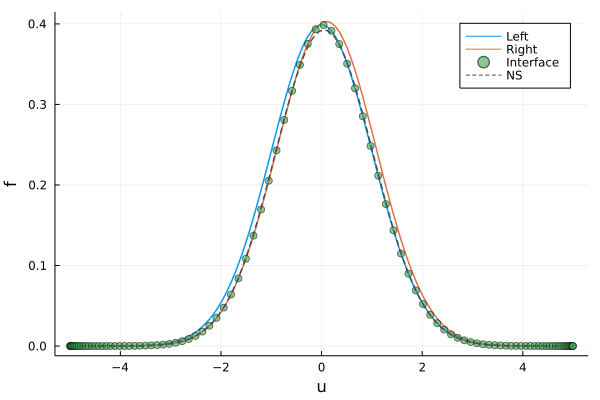

In [41]:
p1 = plot(vs.u, pdfs[1], lw=1.5, label="Left", xlabel="u", ylabel="f")
plot!(p1, vs.u, pdfs[2], lw=1.5, label="Right")
scatter!(p1, vs.u[1:2:end], pdfs[3][1:2:end], label="Interface", alpha=0.6)
plot!(p1, vs.u, fr1, lw=1.5, line=:dash, label="NS", color=:gray30)

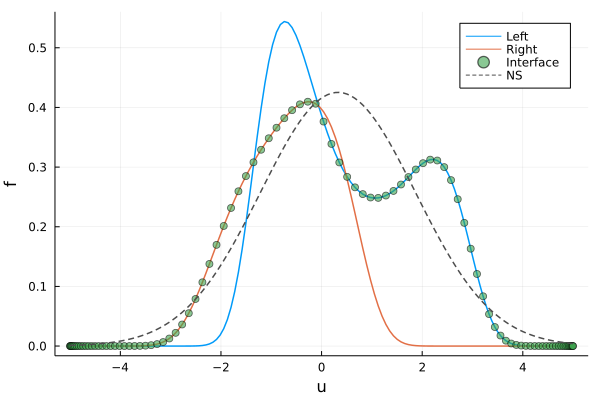

In [42]:
p2 = plot(vs.u, pdfs[4], lw=1.5, label="Left", xlabel="u", ylabel="f")
plot!(p2, vs.u, pdfs[5], lw=1.5, label="Right")
scatter!(p2, vs.u[1:2:end], pdfs[6][1:2:end], label="Interface", alpha=0.6)
plot!(p2, vs.u, fr2, lw=1.5, line=:dash, label="NS", color=:gray30)

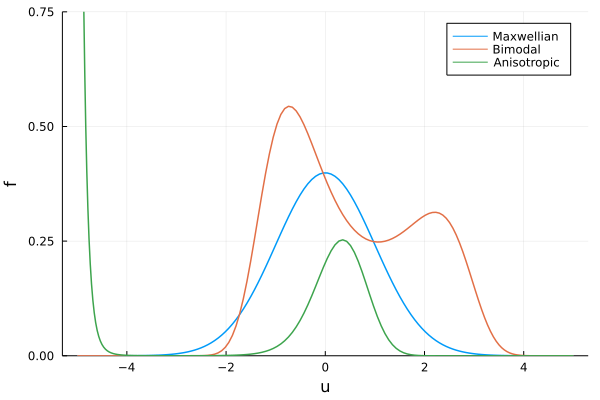

In [48]:
p3 = plot(vs.u, pdfs[1], lw=1.5, label="Maxwellian", xlabel="u", ylabel="f", ylims=(0, 0.75))
plot!(p3, vs.u, pdfs[4], lw=1.5, label="Bimodal")
plot!(p3, vs.u, pdfs[9], lw=1.5, label="Anisotropic")

In [52]:
dirc = "illustrations/"
savefig(p1, dirc * "maxwell_fusion.pdf")
savefig(p2, dirc * "bimodal_fusion.pdf")
savefig(p3, dirc * "entropy_fusion.pdf")